In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from helper import *

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

/home/jakob/software/doumeki/bulkice_doumeki/analysis/tests/helper.py:452: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", comment="#", header=None, names=["diff_time", "pmt_id"], dtype={"dt": np.float64, "pmt_id": np.int16})


In [2]:
simvol = 500 # simulation volume
actvol = 80 # cropped, actual volume
energy = 15
time = 1
pos_den = 0.40614 # positron density from IBD
num_simpos = 723*10000 # 77 (out of 800) runs worth of positrons were killed prematurely, simvol 5E7*1.0048, cropvol 723*10000
depth = 2468.3 # 80: 2118.4, 500: 2468.3
type = "signal"
mask = None
filebase = "cropvol" #"cropvol"
dirname = "~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/"
plotdir = "./plots/signal/"+filebase+"/"

if not os.path.exists(plotdir):
    os.makedirs(plotdir)


plotter = SigBkgPlotter(dirname = dirname, filebase = filebase, type = type, plotdir = plotdir, 
                        simvol = simvol, actvol = actvol, energy = energy, time = time, 
                        pos_den = pos_den, num_simpos = num_simpos, mask = mask, depth = depth)

Loading data from file 'cropvol_500m_15MeV_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/'.


100%|██████████| 100/100 [00:05<00:00, 19.28it/s]


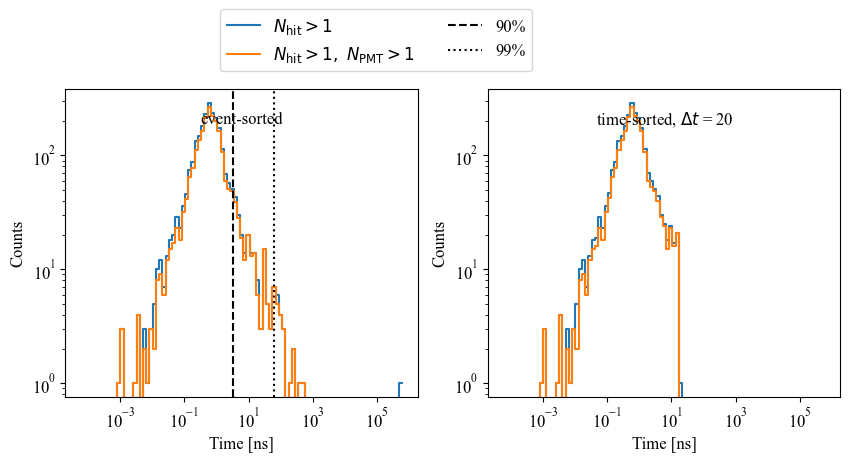

100%|██████████| 100/100 [00:05<00:00, 17.96it/s]


62.748868994116755


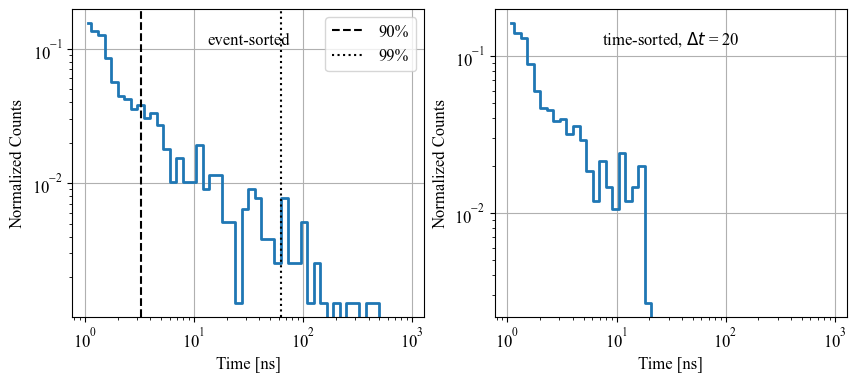

/home/jakob/software/doumeki/bulkice_doumeki/analysis/tests/helper.py:452: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", comment="#", header=None, names=["diff_time", "pmt_id"], dtype={"dt": np.float64, "pmt_id": np.int16})


ZeroDivisionError: division by zero

In [3]:
plotter.run()

In [ ]:
from scipy.optimize import minimize
_, vertex_radius, _, _ = get_coincidence_counts(df, mode = "event")

singlet = vertex_radius[0]
singlet = np.array(singlet)
singlet = singlet[singlet > 25]

y, edge = np.histogram(singlet, bins = 100)
x = (edge[1:]+edge[:-1])/2
logy = np.where(y > 0, np.log(y), 0)

exp_ini = [-0.013, 5]

def exp(x, args):
    return args[0]*np.exp(-x/args[1]) + args[2]

def lin(x, args):
    return args[0]*x + args[1]

def lin_fit (params, x, y):
    return np.sum((y-lin(x,params))**2)

def exp_fit (params, x, y):
    return np.sum((y-exp(x,params))**2)

minimize(lin_fit, x0=exp_ini, args=(x,logy))

/tmp/ipykernel_19874/837258798.py:9: RuntimeWarning: divide by zero encountered in log
  logy = np.where(y > 0, np.log(y), 0)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 12.813921352197436
        x: [-1.609e-02  4.981e+00]
      nit: 2
      jac: [ 6.832e-04 -2.229e-05]
 hess_inv: [[ 7.135e-07 -1.213e-04]
            [-1.213e-04  2.562e-02]]
     nfev: 96
     njev: 28

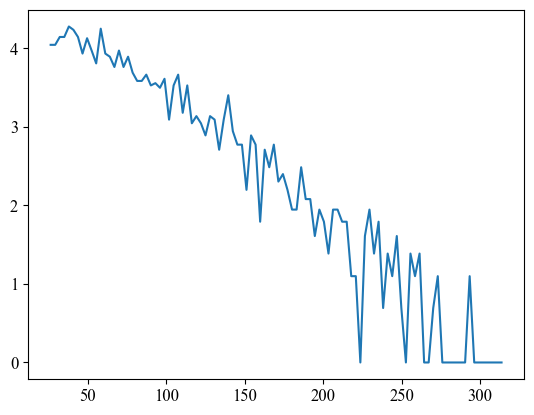

In [ ]:
plt.plot(x,logy)

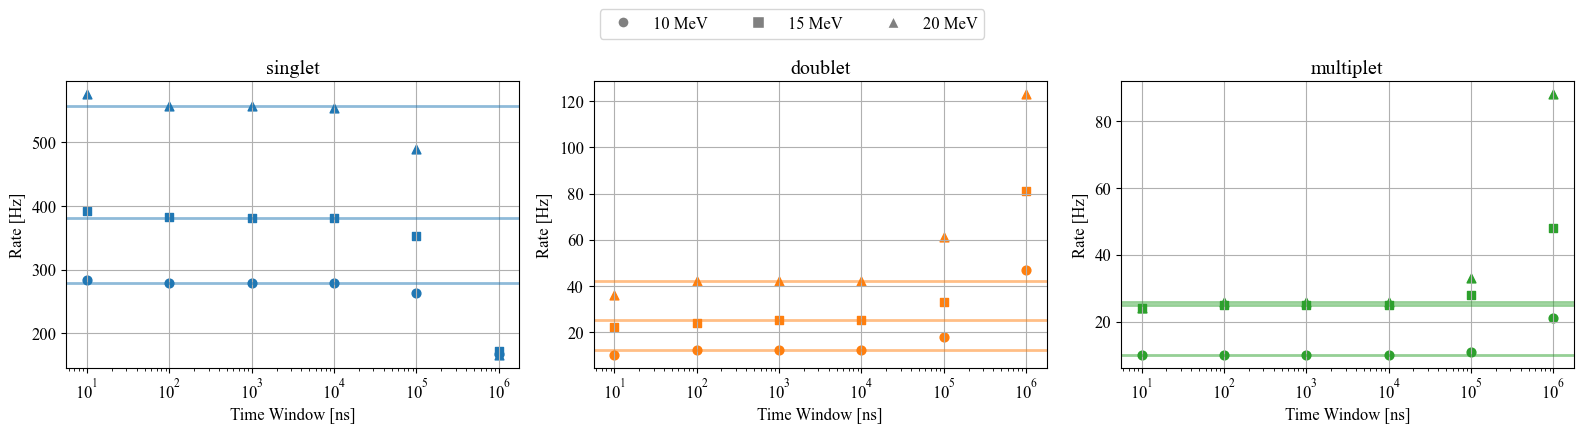

In [ ]:
dirname = "~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/"
simvol = 80
time = 1
energy_range = [10, 15, 20]
mask = None

markers = ["o", "s", "^"]
colors = ["C0", "C1", "C2"]
labels = ["singlet", "doublet", "multiplet"]
tws = np.array([1E1, 1E2, 1E3, 1E4, 1E5, 1E6]) # time windows in ns


fig, ax = plt.subplots(1,3, sharex="row", sharey="col", figsize = (16,4))


for e, energy in enumerate(energy_range): # loop over energy

    filename = f"simvol_{simvol}m_{energy}MeV_{time}s.dat"
    path = os.path.join(dirname, filename)
    df = load_data(path, type, mask) # load data
    counts0, _,_,_ = get_coincidence_counts(df, mode = "event", time_window=None)

    for t, tw in enumerate(tws): # loop over time windows

        counts, _,_,_ = get_coincidence_counts(df, mode = "time", time_window=tw) # get counts

        for k in range(3): # loop over singlet, doublet, multiplet
            ax[k].scatter(tw, counts[k], marker = markers[e], color = colors[k], s = 40) # time-based rate
            if t == 0: ax[k].axhline(counts0[k], color = colors[k], lw = 2, alpha = 0.5) # event-based rate

    for j in range(3):
        ax[j].set_title(labels[j])
        ax[j].set_xlabel("Time Window [ns]")
        ax[j].set_ylabel("Rate [Hz]")
        ax[j].set_xscale("log")
        ax[j].grid()


# create legend handles
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=8, label="10 MeV"),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='grey', markersize=8, label="15 MeV"),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='grey', markersize=8, label="20 MeV"),
]

# Add central legend above the plots
fig.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, 1.1), 
           ncol=3, fontsize=12)

fig.tight_layout()


Loading data from file 'simvol_80m_10MeV_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/'.
Loading data from file 'simvol_80m_15MeV_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/'.
Loading data from file 'simvol_80m_20MeV_1s.dat' from directory '~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/'.


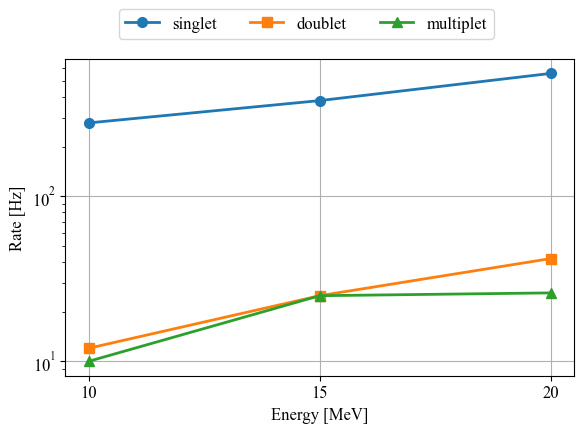

In [ ]:
dirname = "~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/"
simvol = 80
time = 1
energy_range = [10, 15, 20]
mask = None

params = [dirname, energy_range, simvol, time, mask]

plot_trigger_rate_energy(params)

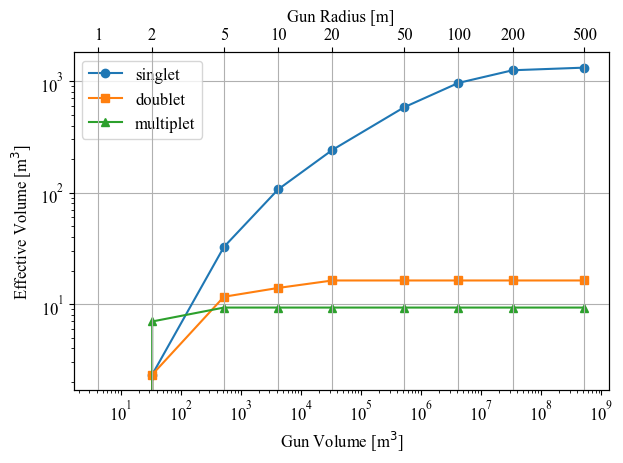

In [ ]:
dirname = "~/software/doumeki/bulkice_doumeki/analysis/files/output_geant4/signal/mDOM/"
simvol = 500
energy = 15
time = 1 
mask = None

params = [dirname, energy, simvol, time, mask]

plot_gun_volume(params)

Old Method: Cumulative (coincidence 1: >= 1, coincidence 2: >=2, etc + ), for given coincidence the hits are return and not how many events are recorded

In [ ]:
#ToDo

#-plot number of counts vs. time window
#-include PMT info
#-plot coincidence for noise!

In [ ]:
plotter.load_data()

In [ ]:
plotter.df

,run_id,event_id,time,energy,pmt_id,hit_pos_x,hit_pos_y,hit_pos_z,ver_pos_x,ver_pos_y,ver_pos_z,parent_id,survival,angle
0,0,4,8.700350e+08,2.416141,16,-0.121949,-0.065769,-0.087020,-19.003258,6.809266,-3.721067,1,0,0.0
1,0,137,3.219601e+08,2.479565,18,0.078573,-0.129116,-0.046456,28.699844,-18.283166,-9.911669,1,0,0.0
2,0,142,5.697531e+07,2.675337,6,-0.064768,0.133632,0.075679,15.830818,26.182578,16.524328,1,0,0.0
3,0,435,4.674726e+08,3.928720,22,-0.088675,-0.017084,-0.154472,-33.712105,3.050593,-32.501029,1,0,0.0
4,0,697,1.820175e+08,2.491621,11,0.105118,-0.075705,0.084471,4.234589,-10.647919,6.173889,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12564,199,8792,9.264544e+08,3.027710,3,-0.009984,-0.106091,0.132084,12.250690,29.618917,-37.961811,1,1,0.0
12565,199,8979,7.190272e+08,3.164886,21,0.001898,0.102128,-0.143201,-24.627320,19.245256,2.100275,1,0,0.0
12566,199,9587,3.304664e+08,4.045325,13,0.072886,0.135157,-0.053086,5.154688,6.987523,-1.585982,1,0,0.0
12567,199,9623,6.041087e+08,3.681501,1,-0.036290,0.085852,0.138399,-8.439014,8.581501,26.218485,8869,0,0.0


In [ ]:
rate = get_trigger_rate(df_in=plotter.df, sort = "time", time_window=10)
rate_cumu =np.array([rate[0], rate[1], np.sum(rate[2:])])
rate_cumu

#vertex = get_trigger_vertex(plotter.df, sort = "event")
#pmt = get_trigger_pmt(plotter.df, sort = "event", time_window=10, mode = "realistic", pmt_resolution=5)
#duration_strict, duration_soft = get_trigger_duration(plotter.df, sort = "event")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 107.55it/s]


array([10360.,   406.,   225.])

In [ ]:
rate2, vertex2, max_count2, pmt2, duration = get_coincidence_counts(df_in=plotter.df, mode = "time", time_window=10, return_vertex=True, pmtcount="realistic", pmt_resolution=5)

100%|██████████| 100/100 [00:05<00:00, 17.08it/s]


In [ ]:
rate_cumu, rate2

(array([10360.,   406.,   225.]), [10360, 406, 225])

In [ ]:
vert2 = np.array([np.array(v) for v in vertex2], dtype = object)

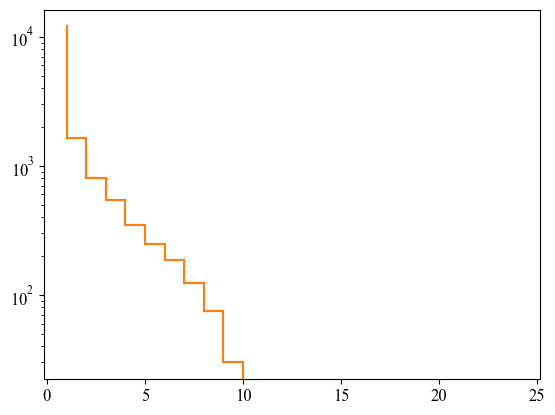

In [ ]:
plt.step(np.arange(1,25),pmt)
plt.step(np.arange(1,25),pmt2)
plt.yscale("log")

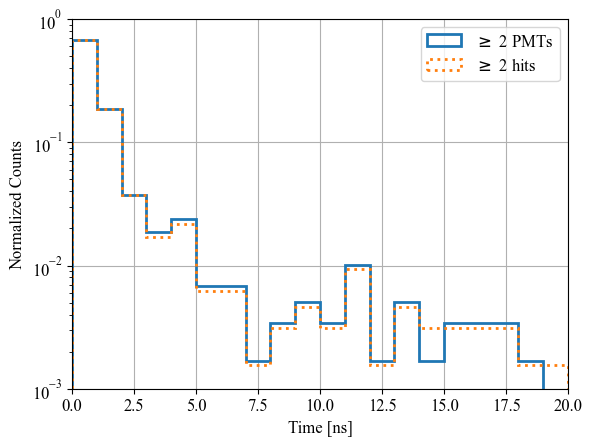

In [ ]:
fig, ax = plt.subplots(1,1)

bins = 20
tmax = 20
trange = np.linspace(0, tmax, num = (bins+1))

ax.hist(duration_strict, density = True, bins = trange, histtype="step", lw = 2, label = r"$\geq$ 2 PMTs")
ax.hist(duration_soft, density = True, bins = trange, histtype="step", lw = 2, ls = ":", label = r"$\geq$ 2 hits")
ax.set_xlabel("Time [ns]")
ax.set_ylabel("Normalized Counts")
ax.set_yscale("log")
ax.set_xlim(0, tmax)
ax.set_ylim(1E-3, 1)
ax.legend()
ax.grid()

In [ ]:
duration_strict, duration_soft = get_trigger_duration(plotter.df, sort = "event", time_window=20)

100%|██████████| 200/200 [00:02<00:00, 81.40it/s]


100%|██████████| 200/200 [00:05<00:00, 35.45it/s]
/home/jakob/software/doumeki/bulkice_doumeki/analysis/tests/helper.py:426: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(path, sep="\s+", comment="#", header=None, names=["diff_time", "pmt_id"], dtype={"dt": np.float64, "pmt_id": np.int16})


ValueError: too many values to unpack (expected 4)

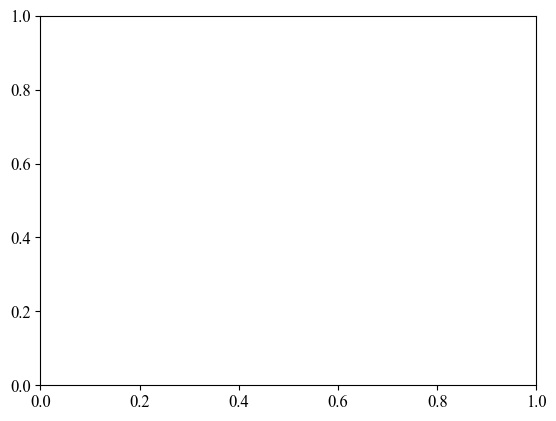

In [ ]:
plot_coincidence_pmt_event(plotter.df)

In [ ]:
time

array([2.21335081e+04, 9.38436566e+04, 1.43950030e+05, ...,
       9.99661176e+08, 9.99697372e+08, 9.99733184e+08])